In [1]:
pip install pandas
pip install plotly
pip install --upgrade kaleido
pip install matplotlib

SyntaxError: invalid syntax (12626602.py, line 1)

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('store_dataset_3000_rows.csv')

In [4]:
print('First 5 lines')
print(df.head())
print("Data Shape") 
print(df.shape)   # kiek eilučių ir stulpelių
print(df.info())  # duomenų tipai, NaN kiekis
print(df.describe())

First 5 lines
  store_id product_id product_name     category  quantity  unit_price  \
0     S004      P0099    Desk Lamp    Furniture       NaN      288.65   
1     S005      P0429      Charger  Electronics      43.0       16.77   
2     S003      P0375   Headphones          NaN      11.0      201.47   
3     S005      P0073    USB Cable  Electronics      48.0      155.17   
4     S005      P0437     Keyboard   Stationery      15.0      358.60   

   discount_percent customer_id transaction_date payment_method   revenue  
0              15.0      C00515       2024-08-24     Debit Card  18892.14  
1              25.0      C00790       2024-03-26     Debit Card    540.83  
2               5.0      C00968       2024-06-15      Gift Card   2105.36  
3              25.0      C00568       2024-05-08           Cash   5586.12  
4               5.0      C00786       2024-06-13            NaN   5110.05  
Data Shape
(3000, 11)
<class 'pandas.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data c

In [5]:
print(f"Prieš: {df.duplicated().sum()} dublikatai")
df = df.drop_duplicates()
print(f"Po: {df.duplicated().sum()} dublikatai")

Prieš: 0 dublikatai
Po: 0 dublikatai


In [6]:
# 5. Tvarkyk NaN (priklausomai nuo dataset'o)
# Jei NaN daugelyje eilučių – pašalink jas
df = df.dropna()  # pašalina eilutes su bet kokiu NaN
# ARBA užpildyk vidurkiu (pvz., Sales stulpelyje)
# df['Sales'] = df['Sales'].fillna(df['Sales'].mean())

print(f"Po valymo: {df.shape} eilučių")
print(df.info())  # patikrink vėl

Po valymo: (1809, 11) eilučių
<class 'pandas.DataFrame'>
Index: 1809 entries, 1 to 2999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          1809 non-null   str    
 1   product_id        1809 non-null   str    
 2   product_name      1809 non-null   str    
 3   category          1809 non-null   str    
 4   quantity          1809 non-null   float64
 5   unit_price        1809 non-null   float64
 6   discount_percent  1809 non-null   float64
 7   customer_id       1809 non-null   str    
 8   transaction_date  1809 non-null   str    
 9   payment_method    1809 non-null   str    
 10  revenue           1809 non-null   float64
dtypes: float64(4), str(7)
memory usage: 169.6 KB
None


In [7]:
# 5. Pagrindiniai KPI
total_revenue = df['revenue'].sum()
total_orders = len(df)  # eiluciu skaicius
avg_order_value = total_revenue / total_orders

print(f"Total Revenue: €{total_revenue:.2f}")
print(f"Total Orders: {total_orders}")
print(f"Avg Order Value: €{avg_order_value:.2f}")


Total Revenue: €20045147.82
Total Orders: 1809
Avg Order Value: €11080.79


In [8]:
# Top 5 produktai pagal revenue
top_products = df.groupby('product_name')['revenue'].sum().sort_values(ascending=False).head(5)

print("Top 5 produktai:")
print(top_products)

# Top 5 klientai
top_customers = df.groupby('customer_id')['revenue'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 klientai:")
print(top_customers)

Top 5 produktai:
product_name
Coffee Mug    1279587.55
Mouse         1181772.07
Phone Case    1126755.70
Webcam        1105219.81
Headphones    1087265.46
Name: revenue, dtype: float64

Top 5 klientai:
customer_id
C00214    119748.21
C00948    109680.64
C00220     99713.26
C00589     95992.46
C00523     92613.02
Name: revenue, dtype: float64


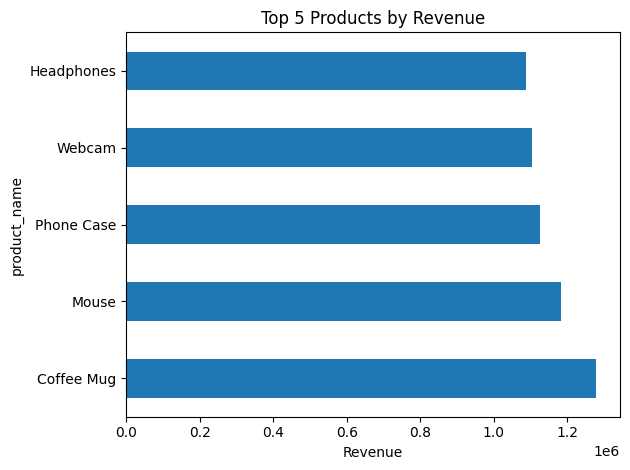

In [9]:
# Išsaugok valytą DF
df.to_csv('cleaned_sales_data.csv', index=False)

# 9. Greita vizualizacija (matplotlib)


top_products.plot(kind='barh')
plt.title('Top 5 Products by Revenue')
plt.xlabel('Revenue')
plt.tight_layout()
plt.savefig('top_products.png')  # screenshot GitHub'ui
plt.show()


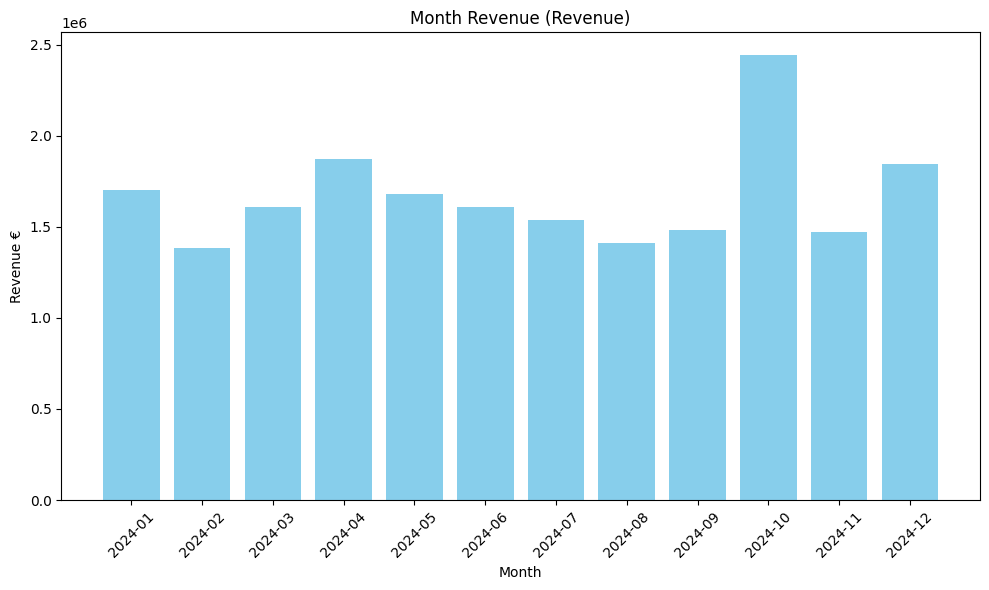

In [10]:
# 1. Paruošk mėnesius (jei stulpelis 'Order Date' arba 'Date')
df['transaction_date'] = pd.to_datetime(df['transaction_date'])  # jei dar ne datetime
df['Month'] = df['transaction_date'].dt.to_period('M')    # pvz., 2023-01

# Grafikas 1: Mėnesinė apyvarta
monthly_sales = df.groupby('Month')['revenue'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)  # kad matplotlib suprastų

plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['Month'], monthly_sales['revenue'], color='skyblue')
plt.title('Month Revenue (Revenue)')
plt.xlabel('Month')
plt.ylabel('Revenue €')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('monthly_revenue.png', dpi=300, bbox_inches='tight')  # išsaugok PNG
plt.show()


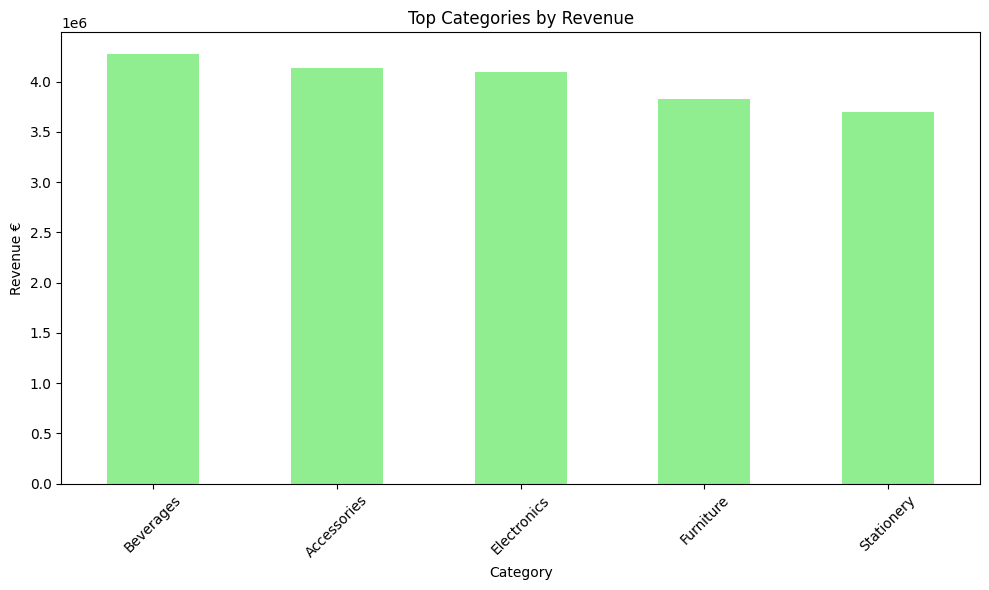

In [11]:
# Grafikas 2: Top kategorijos (pagal 'Category')
category_sales = df.groupby('category')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='lightgreen')
plt.title('Top Categories by Revenue')
plt.xlabel('Category')
plt.ylabel('Revenue €')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_categories.png', dpi=300, bbox_inches='tight')
plt.show()


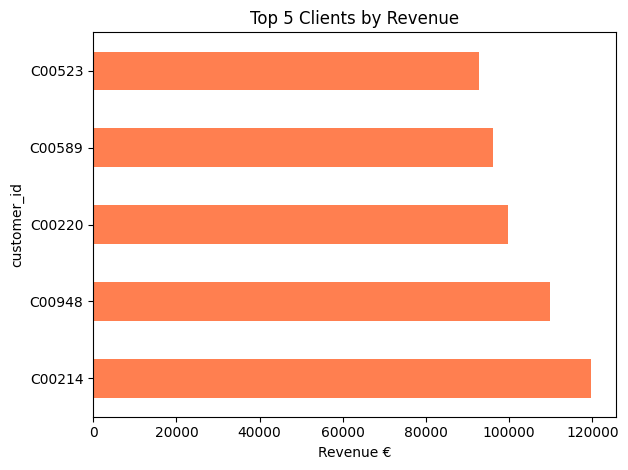

In [12]:
# Grafikas 3: Top 5 klientai (iš ankstesnio kodo)
top_customers.plot(kind='barh', color='coral')  # horizontal bar geriau vardams
plt.title('Top 5 Clients by Revenue')
plt.xlabel('Revenue €')
plt.tight_layout()
plt.savefig('top_customers.png', dpi=300, bbox_inches='tight')
plt.show()


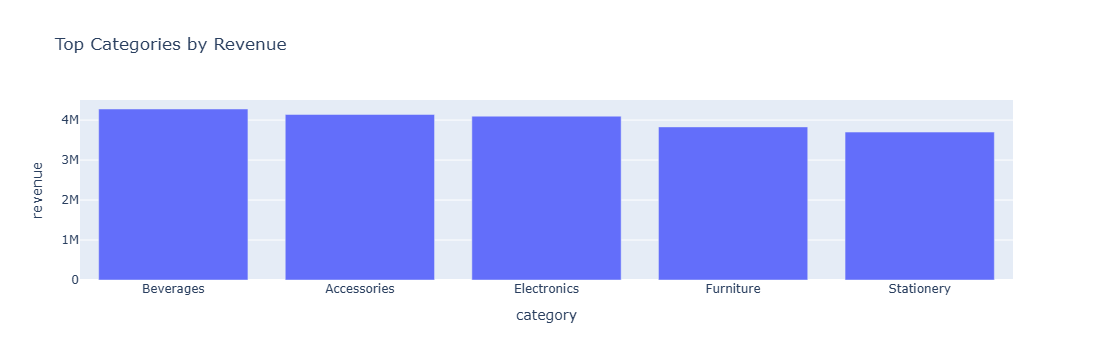

In [18]:
# Tas pats mėnesinis grafikas su Plotly
fig1 = px.bar(monthly_sales, x='Month', y='revenue', title='Monthly turnover (Interactive)')
fig1.write_html('monthly_revenue.html')  # interaktyvus HTML
fig1.write_image('monthly_revenue_plotly.png')  # PNG (reikia kaleido: pip install kaleido)

# Top kategorijos
fig2 = px.bar(category_sales.reset_index(), x='category', y='revenue', 
              title='Top Categories by Revenue')
fig2.write_image('top_categories_plotly.png')

fig2.show()  # parodyk Jupyter'yje
